In [1]:
# pip install -U seaborn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('EcomShipping.csv')
df.head(5).T

,0,1,2,3,4
ID,1,2,3,4,5
Warehouse_block,D,F,A,B,C
Mode_of_Shipment,Flight,Flight,Flight,Flight,Flight
Customer_care_calls,4,4,2,3,2
Customer_rating,2,5,2,3,2
Cost_of_the_Product,177,216,183,176,184
Prior_purchases,3,2,4,4,3
Product_importance,low,low,low,medium,medium
Gender,F,M,M,M,F
Discount_offered,44,59,48,10,46


In [4]:
# Categoric data
df.describe(include='O')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [5]:
# print out the categoric columns and its category 
for c in df.select_dtypes(exclude='number').columns.tolist():
    print(c, sorted(df[c].unique()))

Warehouse_block ['A', 'B', 'C', 'D', 'F']
Mode_of_Shipment ['Flight', 'Road', 'Ship']
Product_importance ['high', 'low', 'medium']
Gender ['F', 'M']


In [6]:
# Numeric data
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Data cleaning (check)

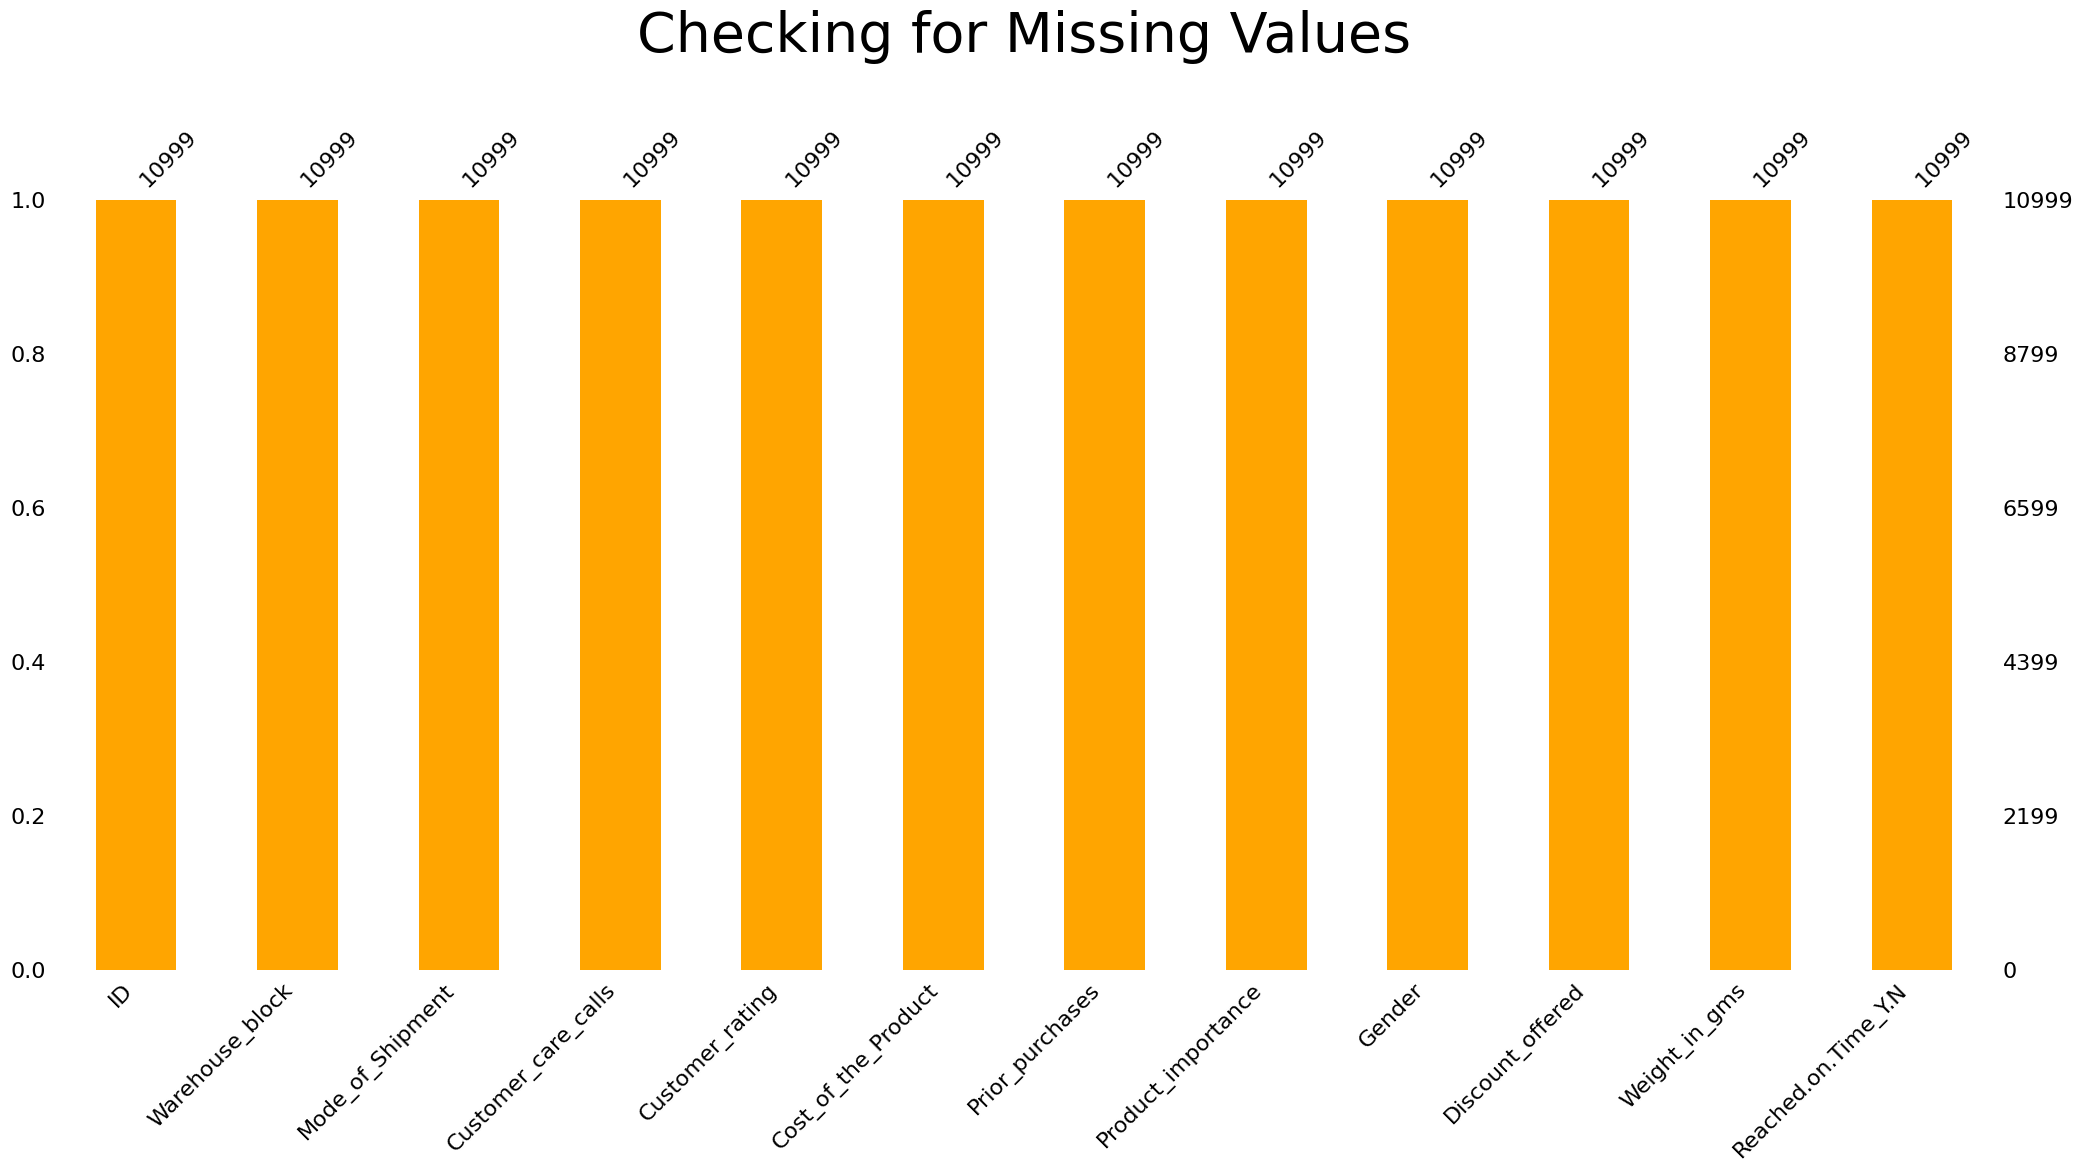

In [7]:
msno.bar(df, color = 'orange')
plt.title('Checking for Missing Values\n', fontsize = 40)
plt.show()

## heatmap of the data for checking the correlation between the features and target column.

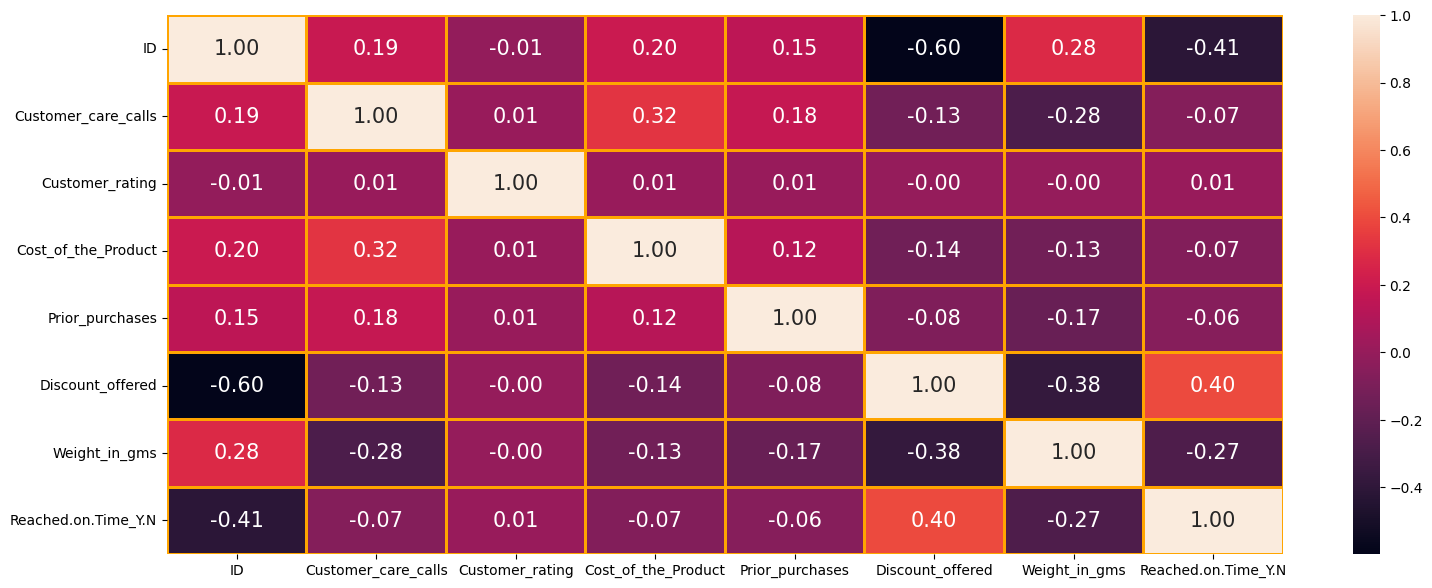

In [8]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='0.2f', 
            annot_kws={'size': 15}, linewidth=2, linecolor='orange')
plt.show()

In [9]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype(str)

## Checking value counts of columns

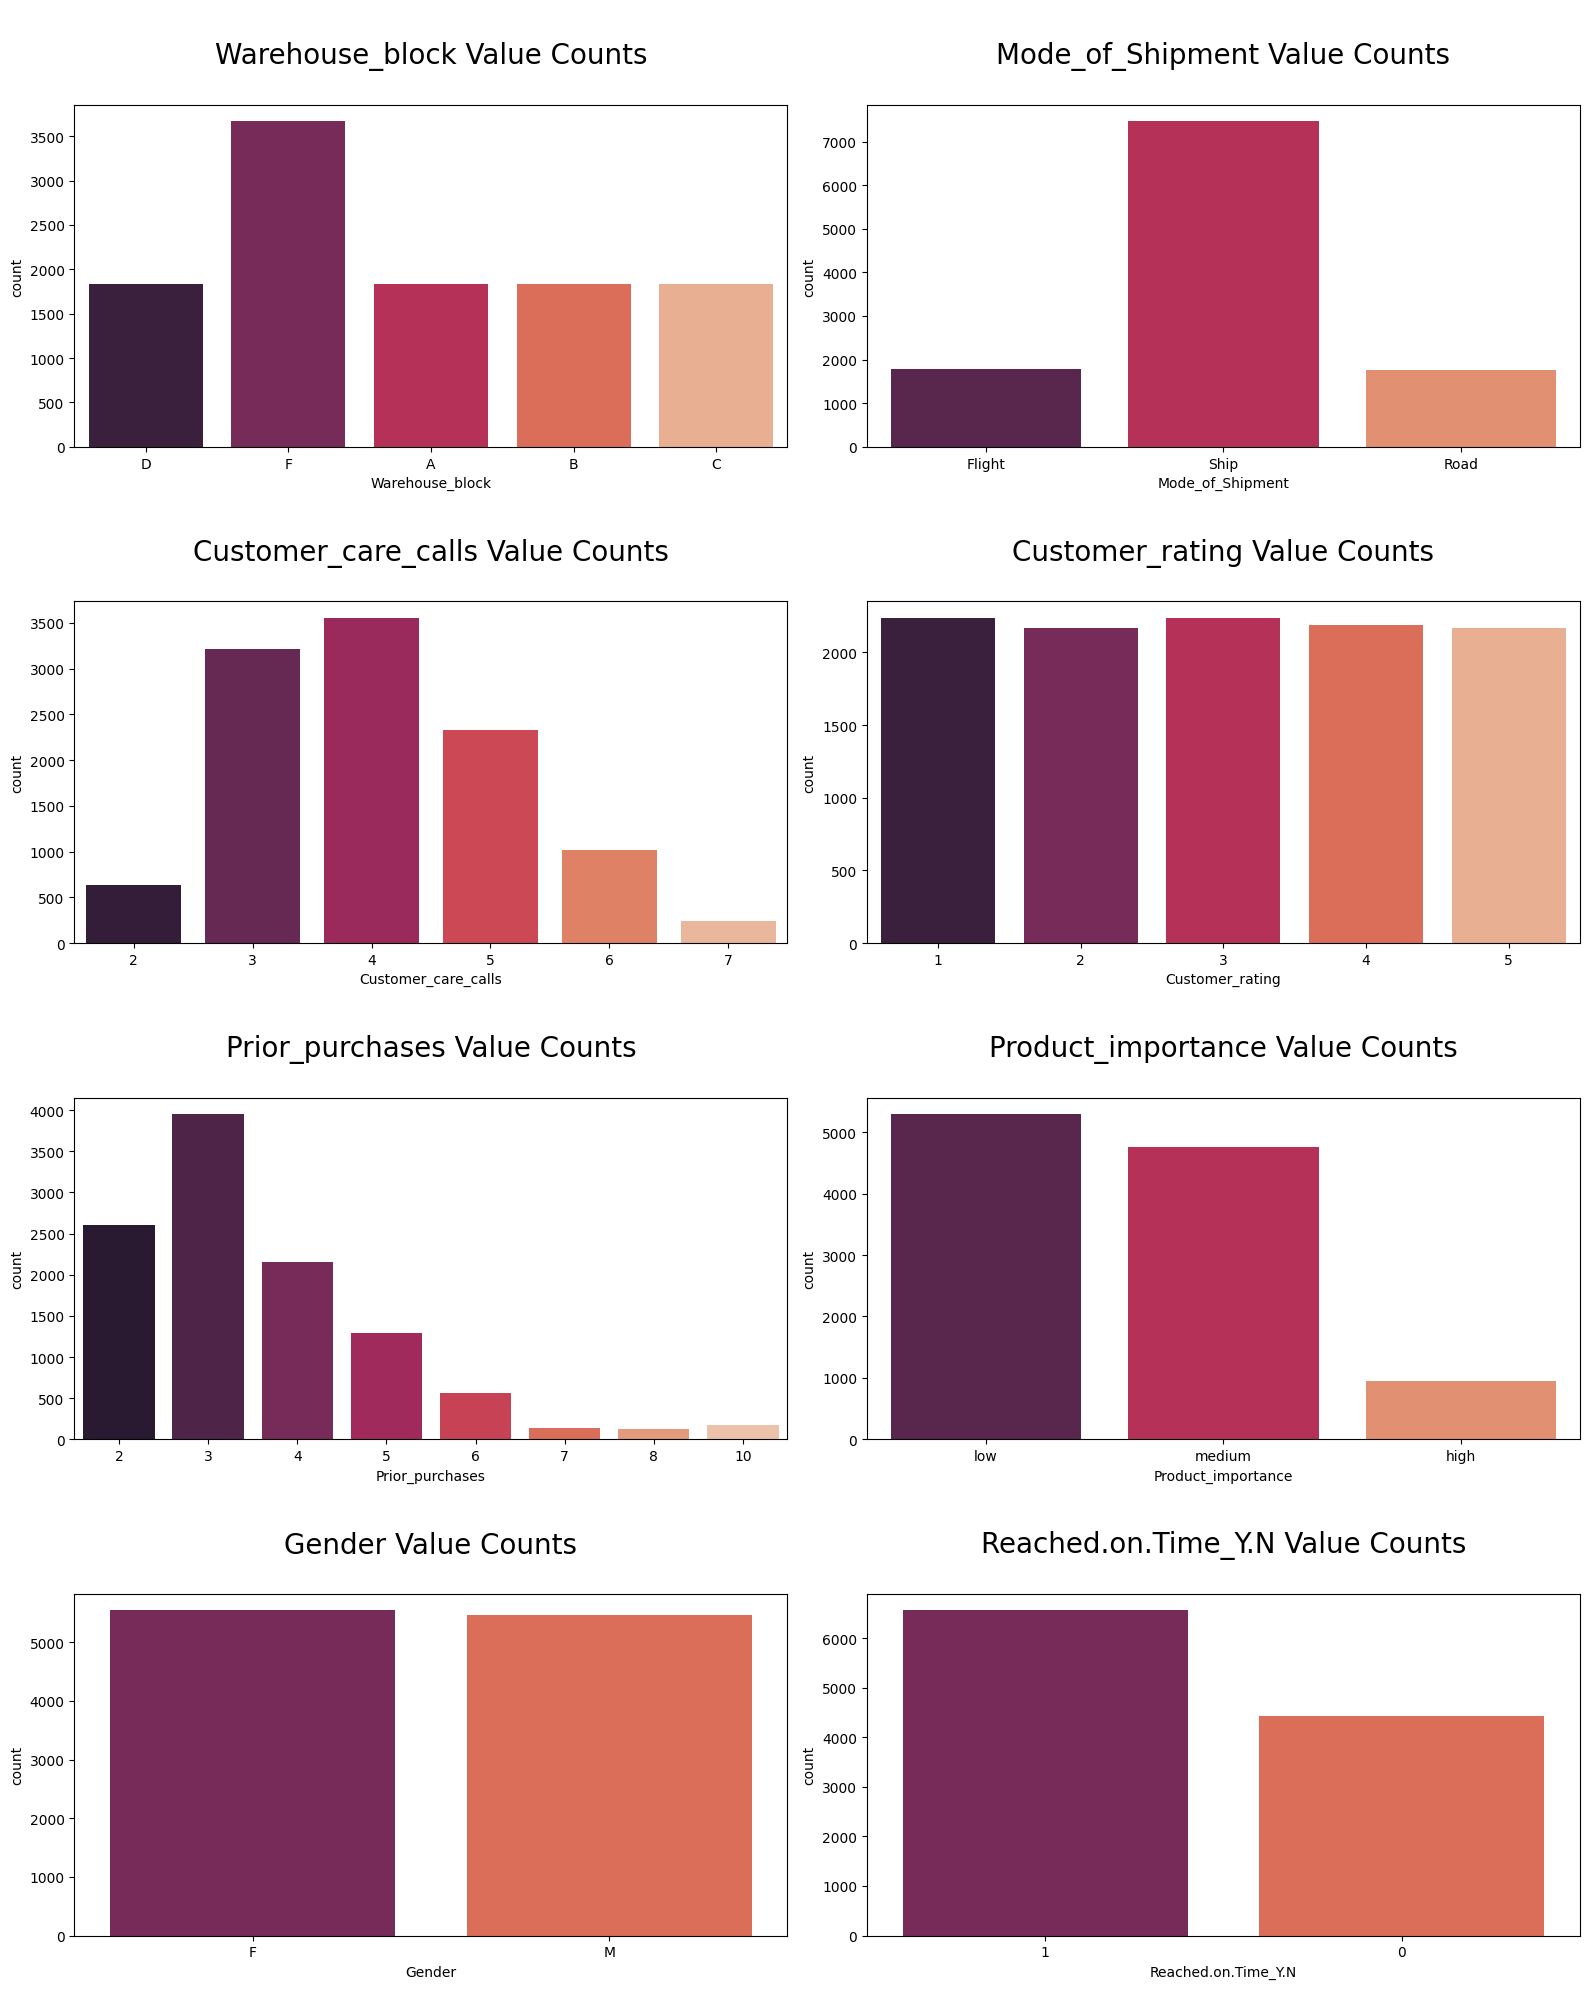

In [13]:
# create columns list to check
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))

# plotting the countplot of each categorical column.
for i, col in enumerate(cols):
    if i <= 8:
        ax = plt.subplot(4, 2, i+1)
        sns.countplot(x = col, data = df, ax = ax, palette='rocket')
        plt.title(f"\n{col} Value Counts\n", fontsize = 20)

plt.tight_layout()
plt.show()

## Exploring relation of categorical columns 

In [11]:
object_columns = df.select_dtypes(include = ['object'])
object_columns.sample(5)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Reached.on.Time_Y.N
9092,A,Ship,medium,F,0
2699,F,Ship,high,F,1
10507,F,Ship,low,M,0
5851,F,Ship,high,F,0
2485,F,Ship,medium,M,1


## Warehouse column and categories proportion

In [ ]:
warehouse = object_columns['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts', 
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

## Reach on time count in warehouse block

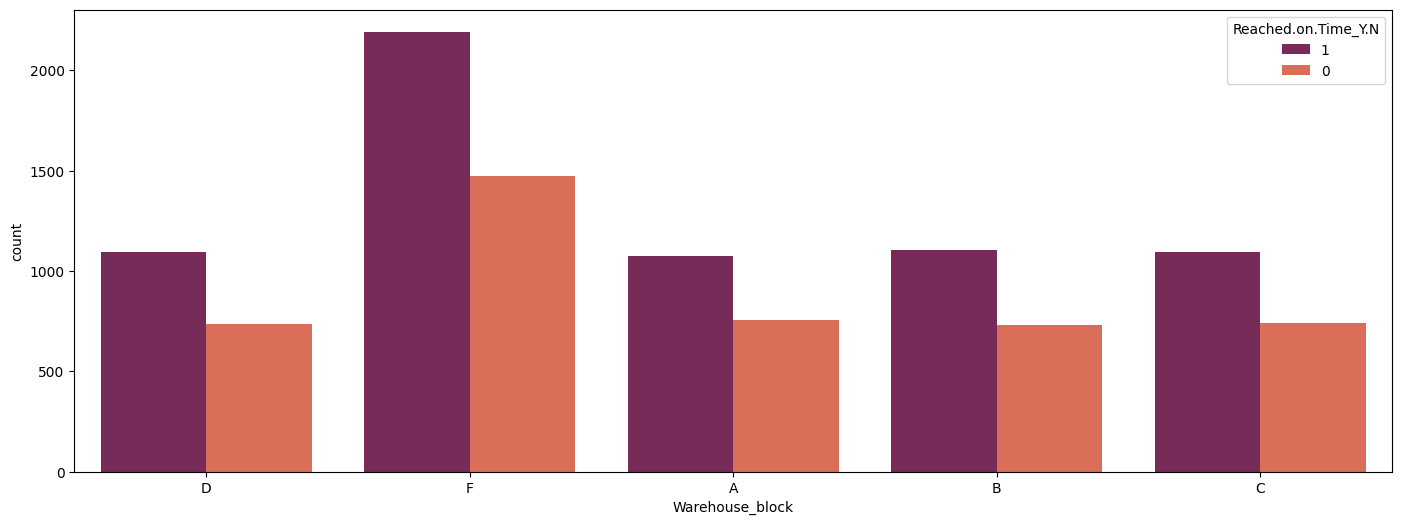

In [15]:
# 1 : NOT on time and 0: on time
plt.figure(figsize = (17, 6))
sns.countplot(data = df, x='Warehouse_block', hue = 'Reached.on.Time_Y.N',  palette='rocket')
plt.show()

## Gender

In [16]:
gender = object_columns['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'value_counts']
fig = px.pie(gender, names = 'Gender', values = 'value_counts',  
             width = 650, height = 400, hole = 0.4, 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo = 'percent+label')

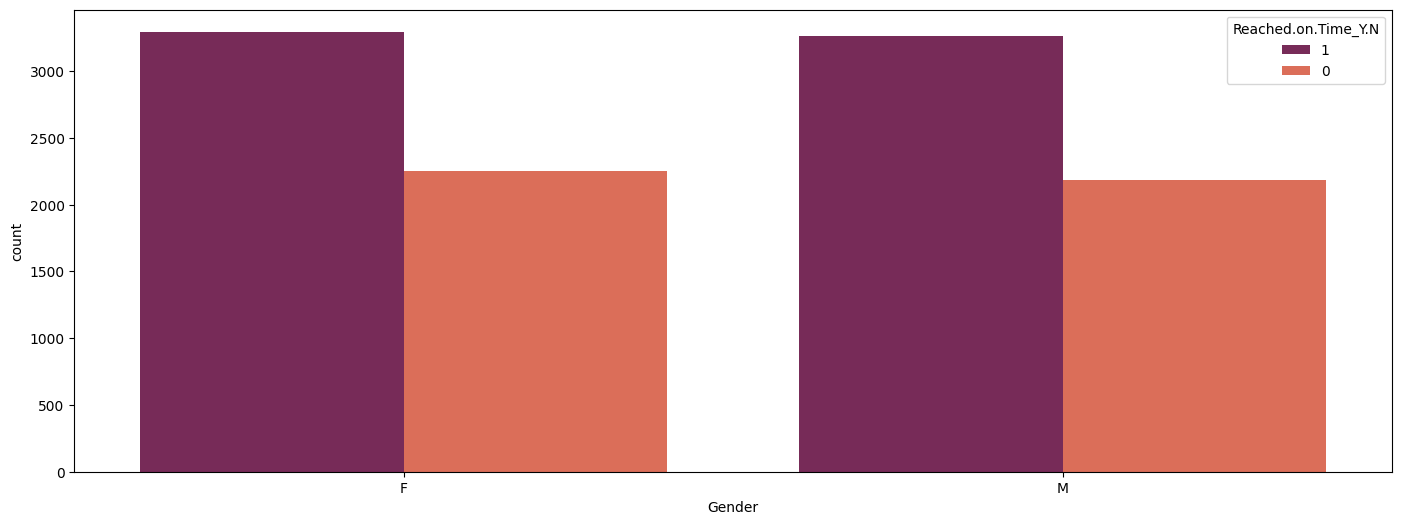

In [17]:
# 1 : NOT on time and 0: on time
plt.figure(figsize = (17, 6))
sns.countplot(x='Gender', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

## Shipment method

In [18]:
mode = object_columns['Mode_of_Shipment'].value_counts().reset_index()
mode.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(mode, names = 'Mode_of_Shipment', values = 'value_counts', 
             color_discrete_sequence = px.colors.sequential.RdBu, 
             width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show()

## Reach on time vs Shipping method

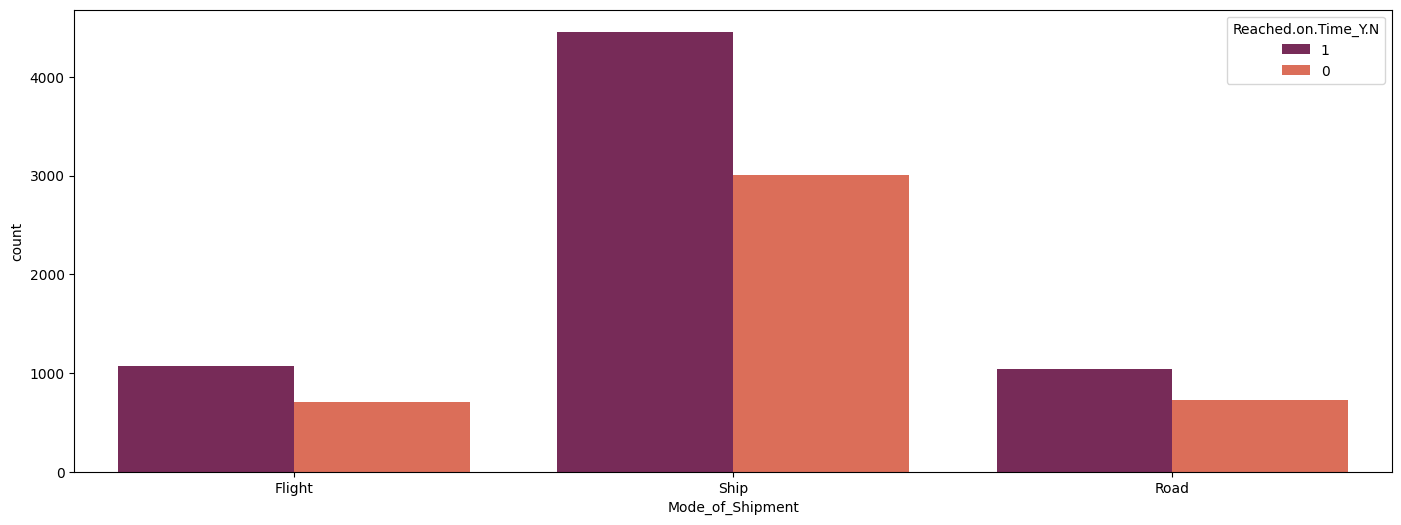

In [19]:
plt.figure(figsize = (17, 6))
sns.countplot(x='Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', 
              data = df, palette='rocket')
plt.show()

## Product importance

In [20]:
product_imp = object_columns['Product_importance'].value_counts().reset_index()
product_imp.columns = ['Product_importance', 'value_counts']
fig = px.pie(product_imp, names = 'Product_importance', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

## Product importance Shipment on time

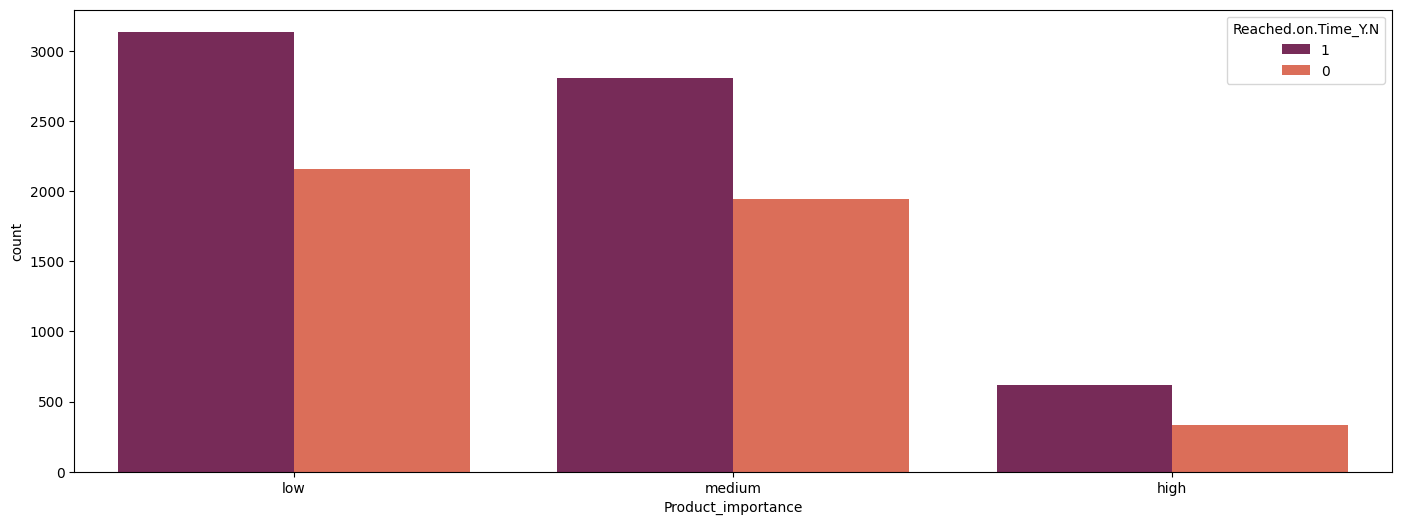

In [21]:
# 1 : NOT on time and 0: on time
plt.figure(figsize = (17, 6))
sns.countplot(x='Product_importance', hue = 'Reached.on.Time_Y.N', 
              data = df, palette='rocket')
plt.show()

## Relation of continuous columns with on time or not

In [22]:
integer_columns = df.select_dtypes(include = ['int64'])
integer_columns.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,1,4,2,177,3,44,1233
1,2,4,5,216,2,59,3088
2,3,2,2,183,4,48,3374
3,4,3,3,176,4,10,1177
4,5,2,2,184,3,46,2484


## Customer care calls

In [23]:
customer_care = integer_columns['Customer_care_calls'].value_counts().reset_index()
customer_care.columns = ['Customer_care_calls', 'value_counts']
fig = px.pie(customer_care, names = 'Customer_care_calls', 
             values = 'value_counts', width = 650, height = 400,
             color_discrete_sequence = px.colors.sequential.RdBu, hole = 0.4)
fig.update_traces(textinfo = 'percent+label')

## Customer call vs Shipment on time

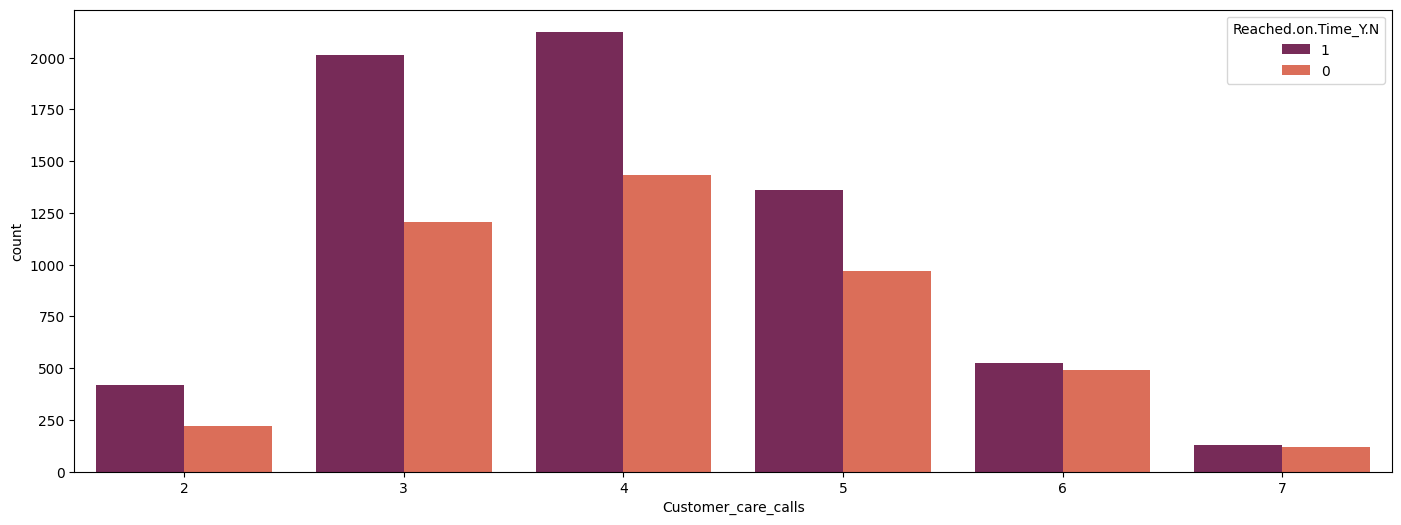

In [24]:
# 1 : NOT on time and 0: on time
plt.figure(figsize = (17, 6))
sns.countplot(data = df, x='Customer_care_calls',   
              palette='rocket', hue = 'Reached.on.Time_Y.N')
plt.show()

## Customers' rating

In [25]:
customer_ratings = integer_columns['Customer_rating'].value_counts().reset_index()
customer_ratings.columns = ['Customer_rating', 'value_counts']
fig = px.pie(customer_ratings, names = 'Customer_rating', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             width = 650, height = 400, hole = 0.4)
fig.update_traces(textinfo = 'percent+label')

## Customers rating vs Shipment on time

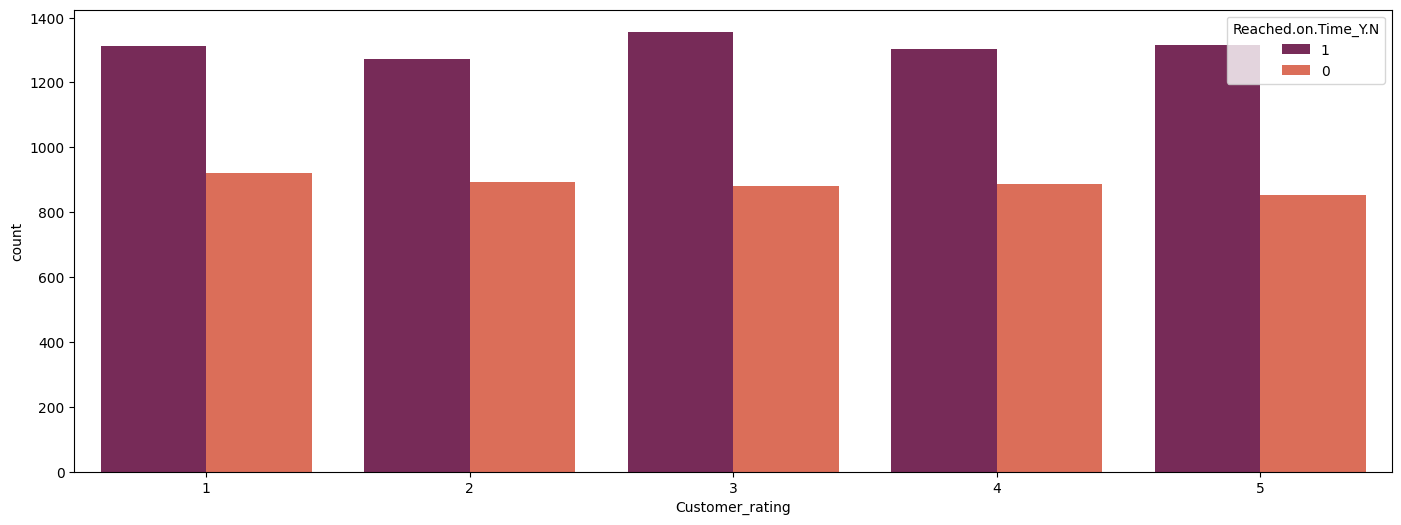

In [26]:
# 1 : NOT on time and 0: on time
plt.figure(figsize = (17, 6))
sns.countplot(x='Customer_rating', hue = 'Reached.on.Time_Y.N', 
              data = df, palette='rocket')
plt.show()

## Prior purchase

In [27]:
prior_purchases = integer_columns['Prior_purchases'].value_counts().reset_index()
prior_purchases.columns = ['Prior_purchases', 'value_counts']
fig = px.pie(prior_purchases, names = 'Prior_purchases', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             width = 650, height = 400, hole = 0.4)
fig.update_traces(textinfo = 'percent+label')

## Prior purchase vs shipment on time

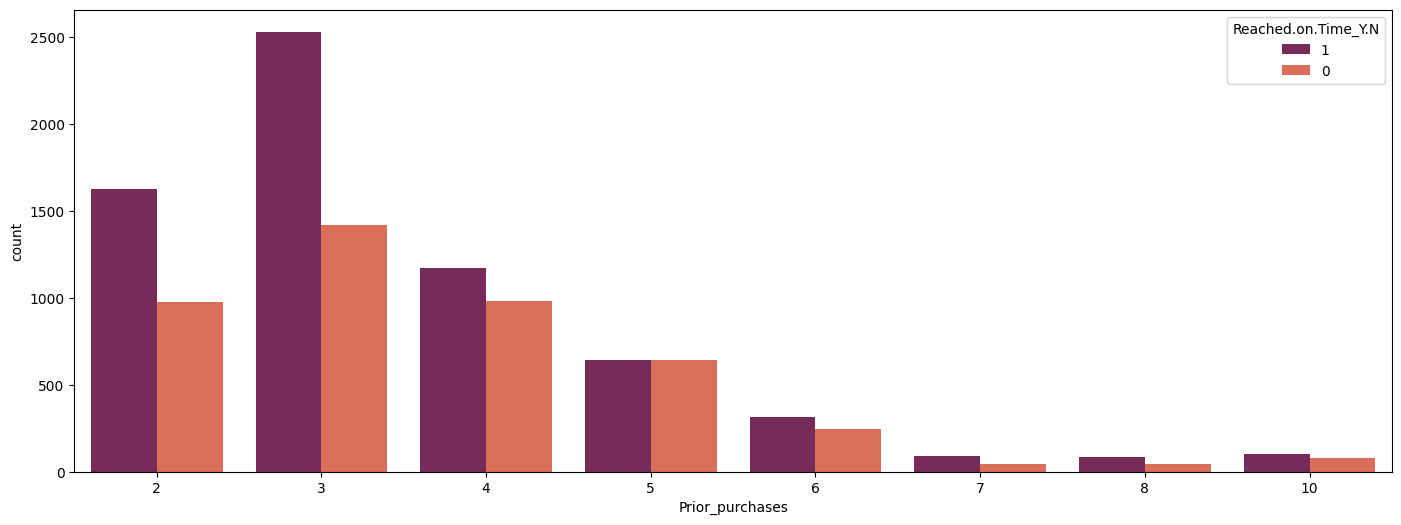

In [28]:
# 1 : NOT on time and 0: on time
plt.figure(figsize = (17, 6))
sns.countplot(x='Prior_purchases', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

## Reach on time vs not on time

In [29]:
# 1 : NOT on time and 0: on time
reached_on_time_y_n = df['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Reached.on.Time_Y.N', 'value_counts']
fig = px.pie(reached_on_time_y_n, names = 'Reached.on.Time_Y.N', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             width = 650, height = 400, hole = 0.4)
fig.update_traces(textinfo = 'percent+label')

## Cost of the product

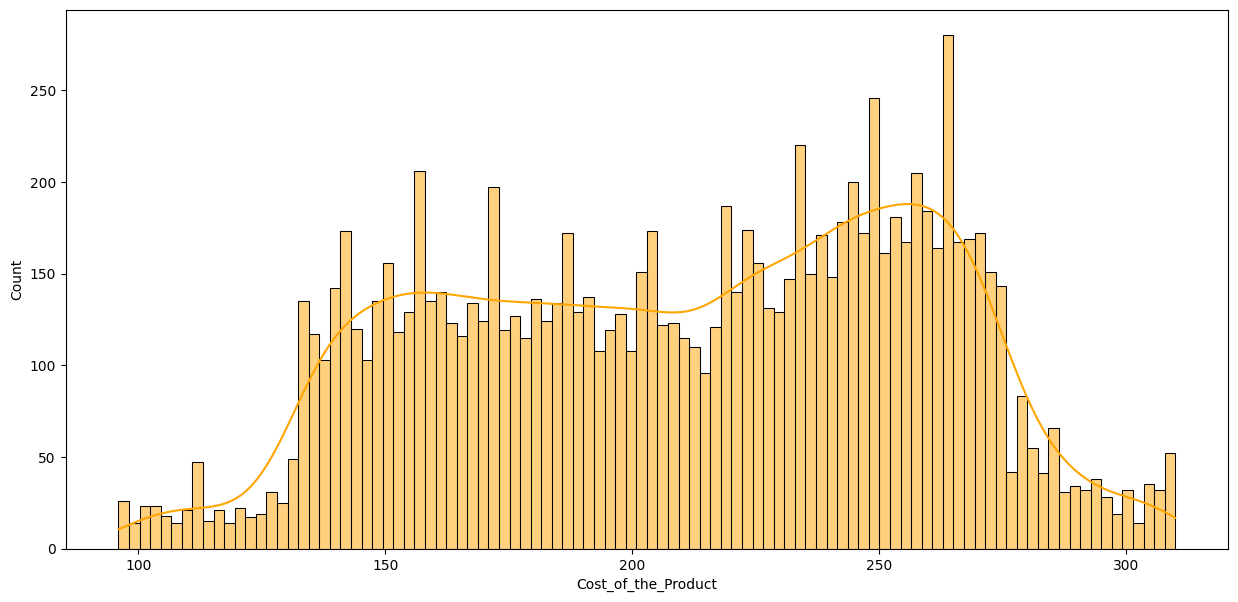

In [30]:
plt.figure(figsize = (15, 7))
ax = sns.histplot(df['Cost_of_the_Product'], bins = 100, color = 'orange', kde=True)

plt.show()

## relation between cost of the product and shipment on time

In [31]:
# 1 : NOT on time and 0: on time
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', 
       color = 'Reached.on.Time_Y.N' )

# === Part 2 ===

## Discount offered distribution

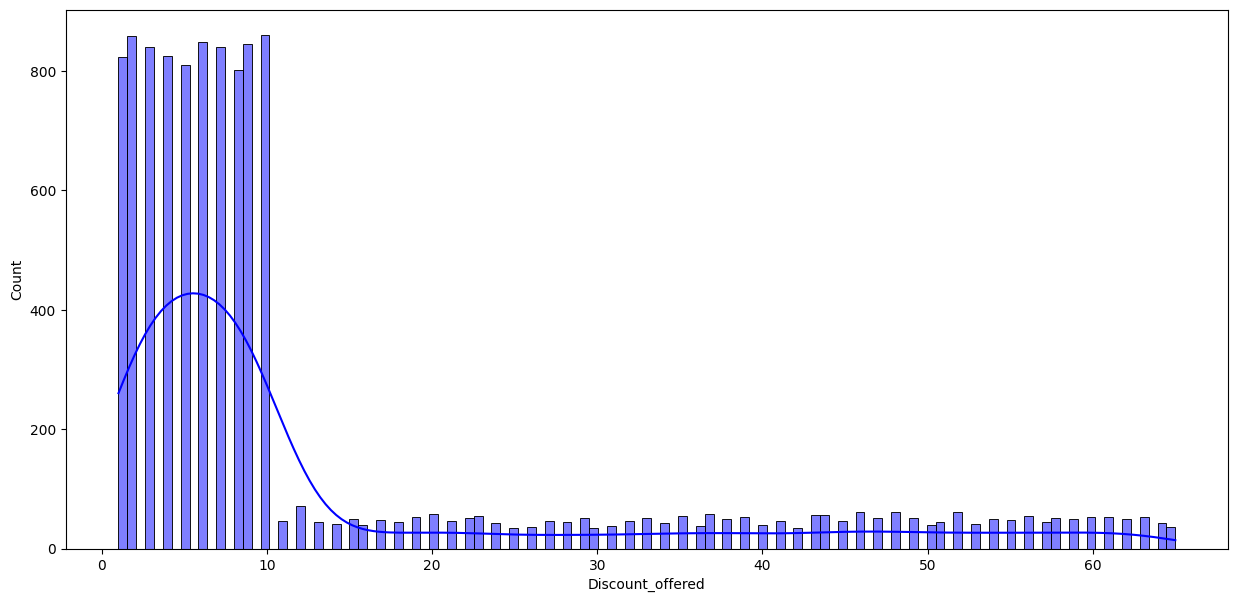

In [32]:
plt.figure(figsize = (15, 7))
ax = sns.histplot(df['Discount_offered'], color = 'b', kde=True)
plt.show()

## Relation between discount offered vs Shipment on time

In [33]:
# 1 : NOT on time and 0: on time
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N')

## Weight in grams

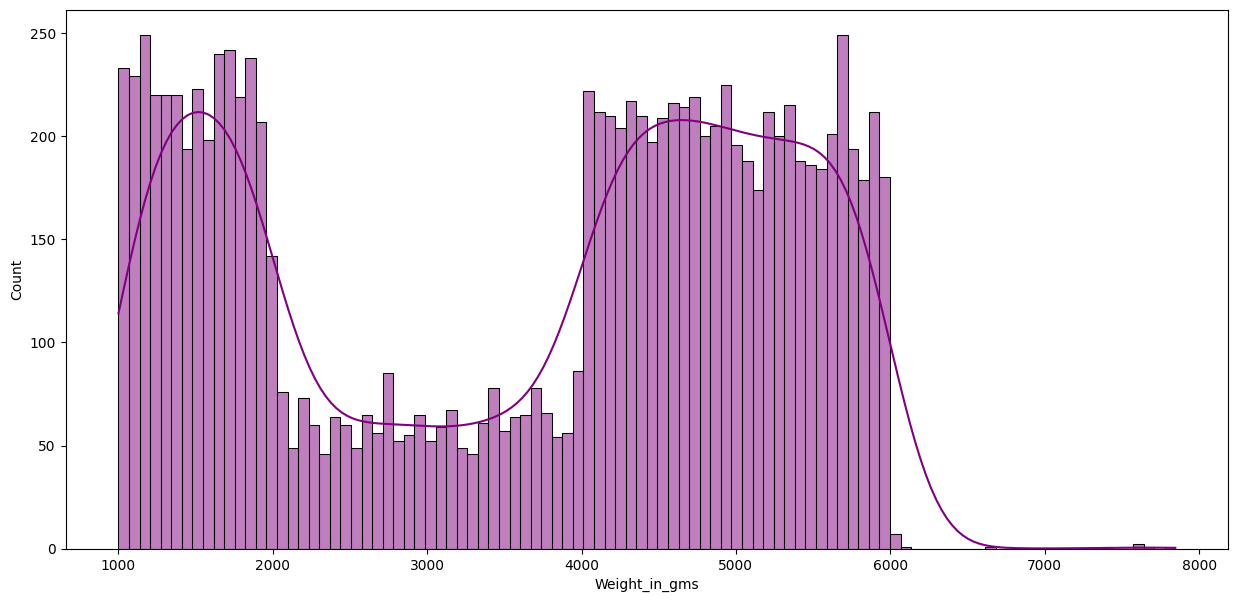

In [34]:
plt.figure(figsize = (15, 7))
ax = sns.histplot(df['Weight_in_gms'], bins = 100, color = 'purple', kde=True)
plt.show()

## Relation between weights in grams and Shipment on time

In [35]:
# 1 : NOT on time and 0: on time
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', )

## Which warehouse contains most weights?

In [36]:
ware_block_weight = df.groupby(['Warehouse_block'])['Weight_in_gms'].sum().reset_index()
ware_block_weight

,Warehouse_block,Weight_in_gms
0,A,6627118
1,B,6664240
2,C,6674560
3,D,6655305
4,F,13349327


In [37]:
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, 
             color = 'Warehouse_block', marginal = 'box')

## Mode of shipment vs Weight in grams

In [38]:
shipment_mode_weight = df.groupby(['Mode_of_Shipment'])['Weight_in_gms'].sum().reset_index()
shipment_mode_weight

,Mode_of_Shipment,Weight_in_gms
0,Flight,6449405
1,Road,6423209
2,Ship,27097936


In [39]:
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, 
             color = 'Mode_of_Shipment', marginal = 'box')

## Warehouse vs Cost of product

In [40]:
warehouse_weight = df.groupby(['Warehouse_block'])['Cost_of_the_Product'].sum().reset_index()
warehouse_weight

,Warehouse_block,Cost_of_the_Product
0,A,382671
1,B,388888
2,C,387114
3,D,386805
4,F,766477


In [41]:
px.histogram(data_frame = df, x = 'Cost_of_the_Product', nbins = 100, 
             color = 'Warehouse_block', marginal = 'box')

## Cost of product vs Shipment mode

In [42]:
mode_shipment_cost = df.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().reset_index()
mode_shipment_cost

,Mode_of_Shipment,Cost_of_the_Product
0,Flight,371938
1,Road,370437
2,Ship,1569580


In [43]:
px.histogram(data_frame = df, x = 'Cost_of_the_Product', nbins = 100, 
             color = 'Mode_of_Shipment',  marginal = 'box')

## Customer call effect on ratings?

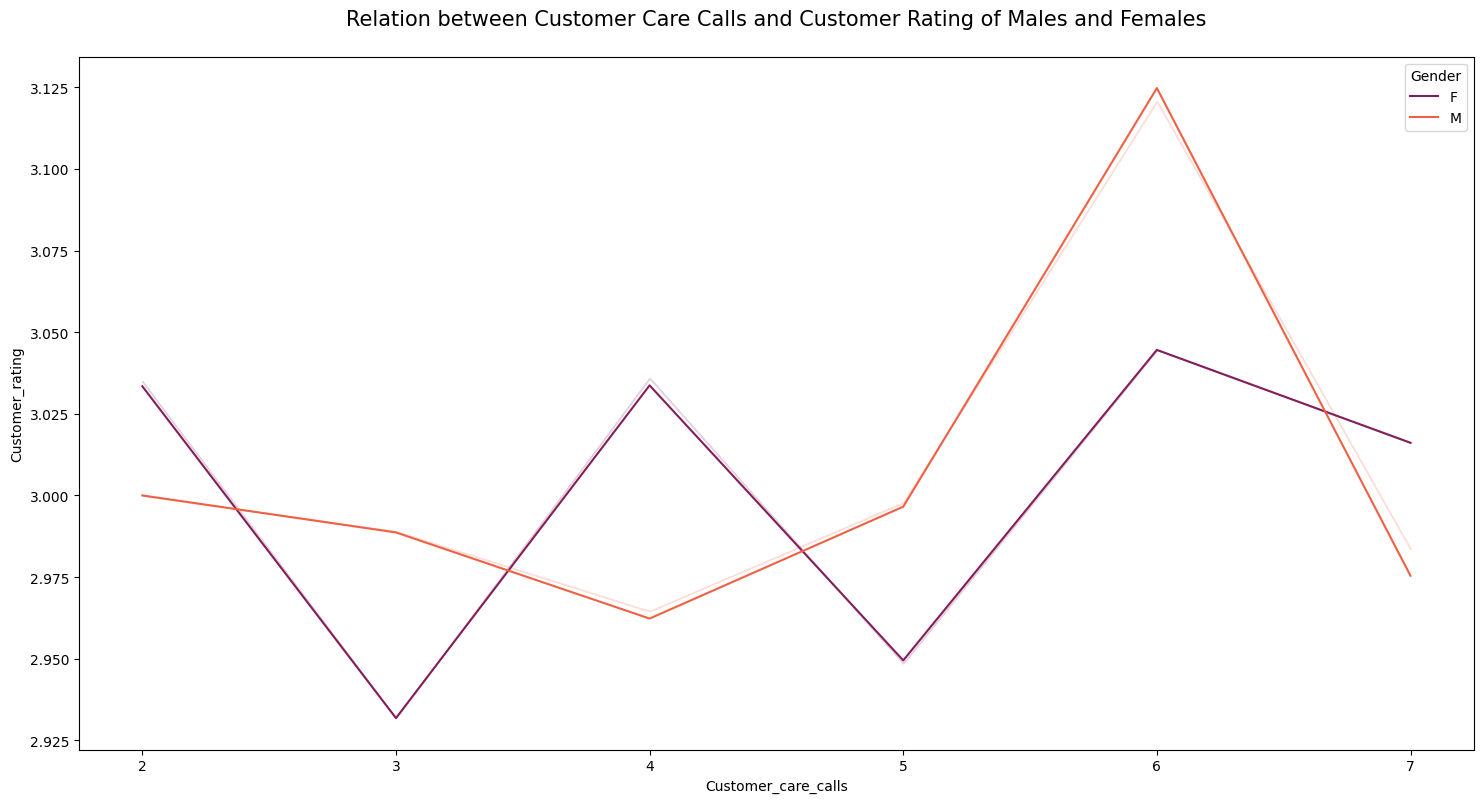

In [44]:
plt.figure(figsize = (18, 9))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender', data = df,
             palette = 'rocket', errorbar=('ci', 0))
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females\n',
          fontsize = 15)
plt.show()

## Relation between customer care calls, customer ratings and shipmetn on time

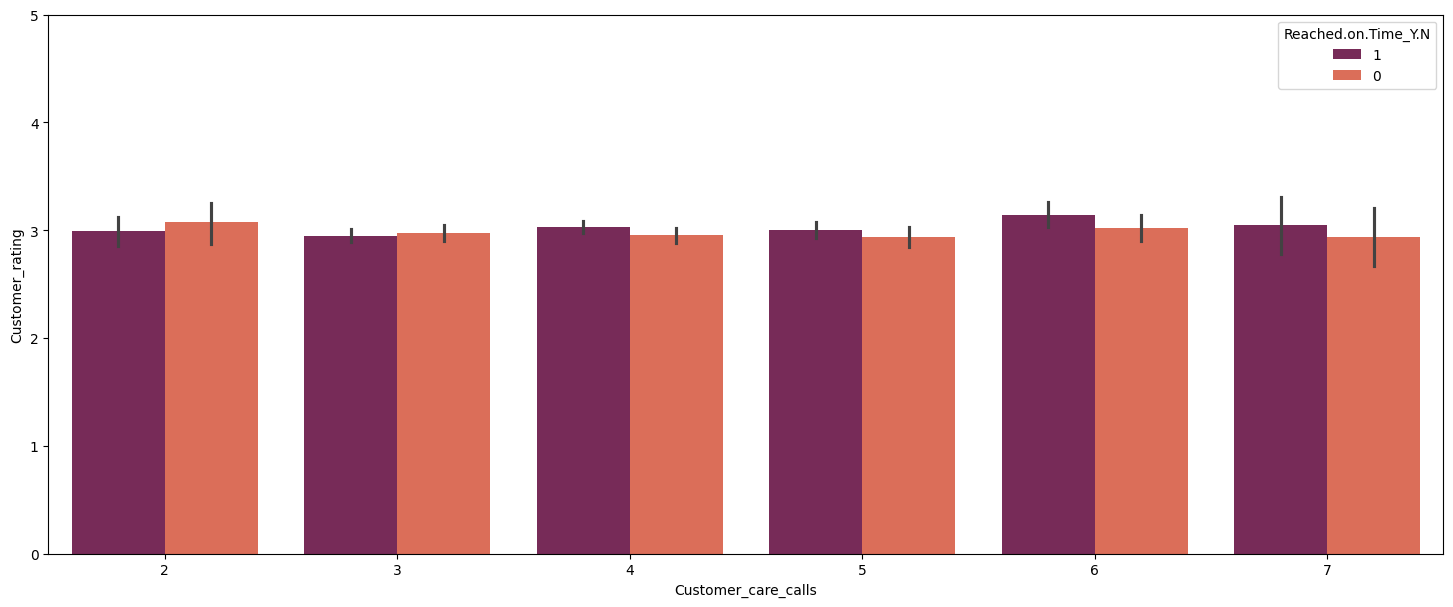

In [45]:
plt.figure(figsize = (18, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', 
            hue = 'Reached.on.Time_Y.N', data = df, palette = 'rocket')
plt.ylim(0, 5)
plt.show()

## Relation between Customer calls, Prior purchase and Product importance

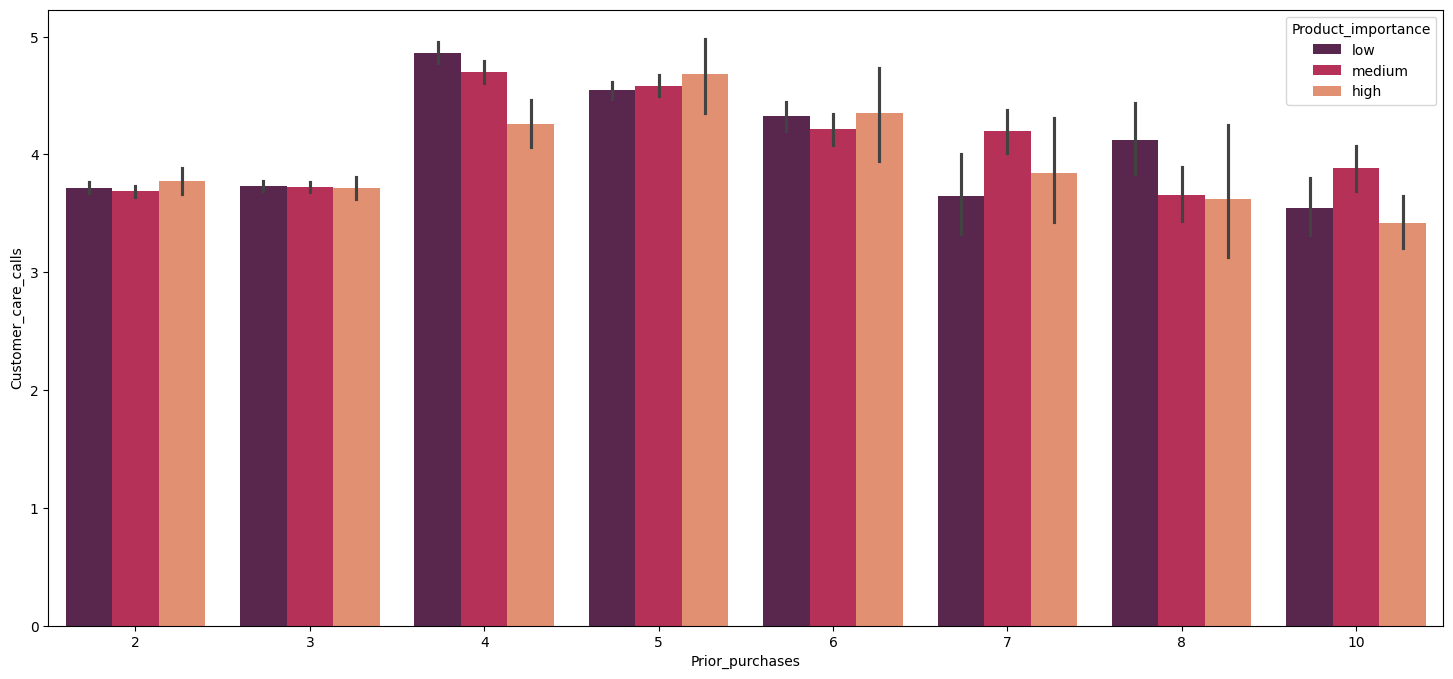

In [46]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Prior_purchases', y = 'Customer_care_calls', data = df, 
            hue = 'Product_importance', palette = 'rocket')
plt.show()

## Product importance vs Customer call on Shipment on time

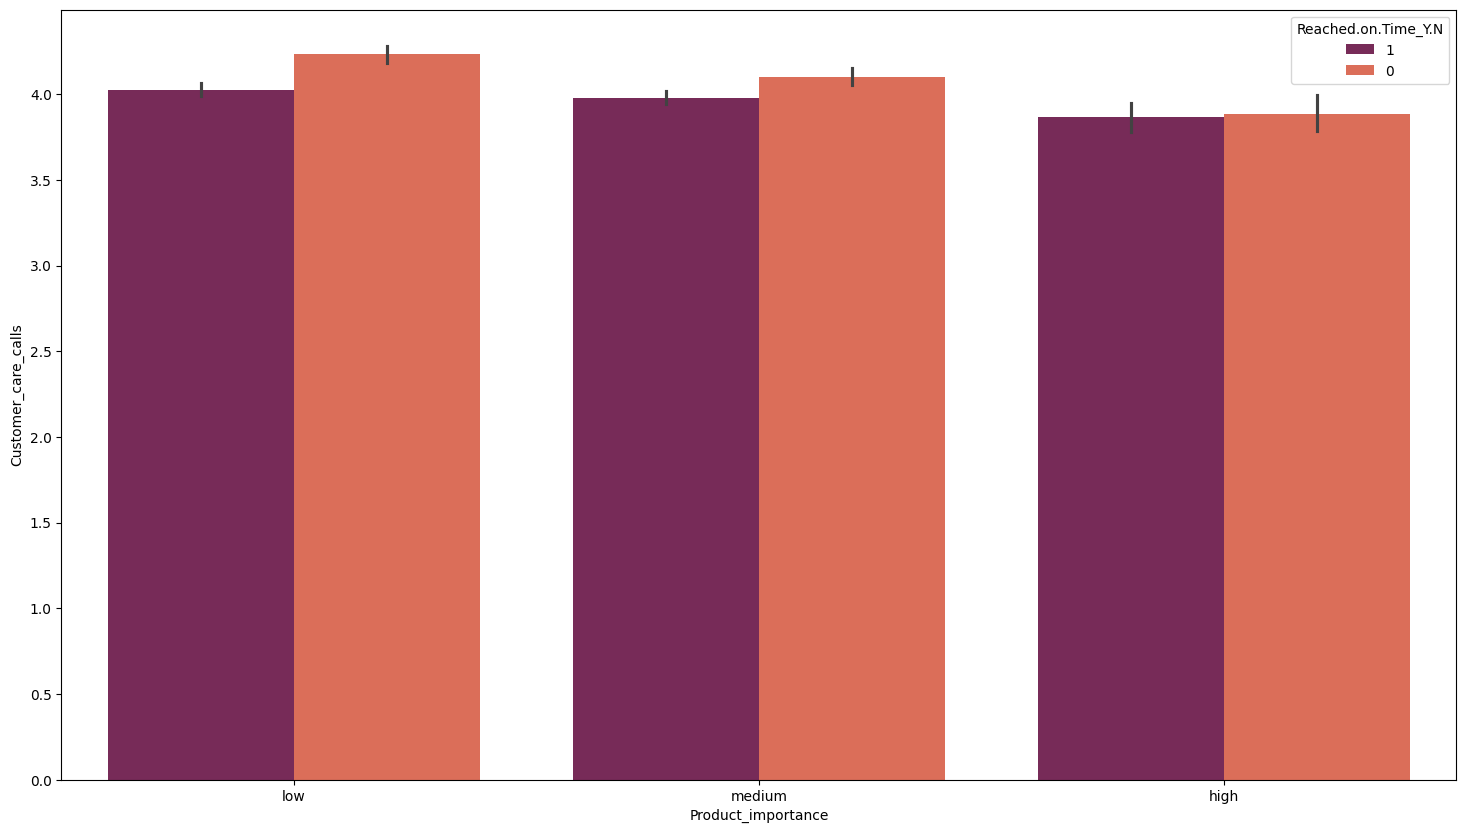

In [47]:
plt.figure(figsize = (18, 10))
sns.barplot(x='Product_importance', y = 'Customer_care_calls', 
            hue = 'Reached.on.Time_Y.N', data = df, palette = 'rocket')
plt.show()

## Product importance and Discount offered

In [48]:
px.box(data_frame = df, x = 'Product_importance', y ='Discount_offered', 
       color = 'Product_importance')

## Cost of product vs Product importance on Shipment on time

In [49]:
# 1 : NOT on time and 0: on time
px.box(data_frame = df, x = 'Product_importance', y ='Cost_of_the_Product', 
       color = 'Reached.on.Time_Y.N')

## Relation Prior_purchases and Discount Offered

In [50]:
px.box(x = 'Prior_purchases', y = 'Discount_offered', data_frame = df, 
       color = 'Prior_purchases')

 ## Relation Prior_purchases and Discount Offered and Shipment on time

In [51]:
# 1 : NOT on time and 0: on time
px.box(x = 'Prior_purchases', y = 'Discount_offered', data_frame = df, 
       color = 'Reached.on.Time_Y.N')

## Customer care calls and weight in grams

In [52]:
px.box(x = 'Customer_care_calls', y = 'Weight_in_gms', data_frame = df, 
       color = 'Customer_care_calls')

In [53]:
## Customer care calls and weight in grams on shipment on time

In [54]:
# 1 : NOT on time and 0: on time
px.box(x = 'Customer_care_calls', y = 'Weight_in_gms', data_frame = df, 
       color = 'Reached.on.Time_Y.N')

## Relation of Prior purchase and Weight

In [55]:
px.box(x = 'Prior_purchases', y = 'Weight_in_gms', data_frame = df, 
       color = 'Prior_purchases')

## Relatio of Prior purchases, Weights in gram and Shipment on time

In [56]:
# 1 : NOT on time and 0: on time
px.box(x = 'Prior_purchases', y = 'Weight_in_gms', data_frame = df, 
       color = 'Reached.on.Time_Y.N')

## Relation of prior purchases and cost of the products

In [57]:
px.box(x = 'Prior_purchases', y = 'Cost_of_the_Product', data_frame = df, 
       color = 'Prior_purchases')

## Prior purchases and Products cost on Shipment on time

In [58]:
# 1 : NOT on time and 0: on time
px.box(x = 'Prior_purchases', y = 'Cost_of_the_Product', data_frame = df, 
       color = 'Reached.on.Time_Y.N')

## Relation of cost of the products and customer care calls

In [59]:
px.box(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data_frame = df, 
       color = 'Customer_care_calls')

## Product cost and Customer call on Shipment on time

In [60]:
# 1 : NOT on time and 0: on time
px.box(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data_frame = df, 
       color = 'Reached.on.Time_Y.N')

## Relation between Cost of the product and Discount offered and Shipment on time

In [ ]:
# 1 : NOT on time and 0: on time
plt.figure(figsize = (15, 7))
sns.scatterplot(x='Discount_offered', y='Cost_of_the_Product', 
                data=df, hue='Reached.on.Time_Y.N')
plt.show()